In [61]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
import numpy as np
import pandas as pd

In [63]:
from data_handler import DataHandler

In [64]:
mens_dh = DataHandler('mens')
womens_dh = DataHandler('womens')

In [65]:
mens_data = mens_dh.read_data()
womens_data = womens_dh.read_data()

In [78]:
from data_preparation import prepare_template, merge_data

template = prepare_template(womens_data['Tourney']['CompactResults'])
merged_data = merge_data(template, womens_data)
merged_data

,Season,TeamID_1,TeamID_2,is_won,SeedNum_1,SeedNum_2,Score_sum_1,Score_mean_1,Score_median_1,Score_max_1,...,SeedNum_diff,WinRate_diff,Score_sum_diff,Score_mean_diff,Score_median_diff,WinRate_ratio,Score_min_ratio,Score_max_ratio,Score_mean_ratio,Score_median_ratio
0,1998,3104,3422,1,2,15,2297,76.566667,74.0,104,...,-13,-0.003704,287,2.122222,-1.0,0.994737,1.208333,1.118280,1.028507,0.986667
1,1998,3112,3365,1,3,14,2116,78.370370,81.0,107,...,-11,-0.007937,-28,1.798942,6.0,0.989899,1.038462,0.963964,1.023494,1.080000
2,1998,3163,3193,1,2,15,2696,84.250000,83.5,126,...,-13,0.223214,746,14.607143,13.0,1.312500,1.750000,1.415730,1.209744,1.184397
3,1998,3198,3266,1,7,10,2337,80.586207,80.0,113,...,-3,0.196286,430,7.240053,5.5,1.255172,1.240000,1.255556,1.098711,1.073826
4,1998,3203,3208,1,10,7,1818,69.923077,69.5,91,...,3,0.000000,-178,-6.846154,-8.5,1.000000,1.209302,0.938144,0.910822,0.891026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,2019,3234,3124,0,2,1,2555,79.843750,77.5,106,...,1,-0.156250,-20,-0.625000,0.0,0.838710,0.904762,0.913793,0.992233,1.000000
2768,2019,3390,3323,0,2,1,2393,74.781250,72.0,115,...,1,-0.034091,-545,-14.249053,-19.0,0.962500,0.738462,1.095238,0.839953,0.791209
2769,2019,3332,3124,0,2,1,2725,85.156250,83.5,115,...,1,-0.093750,150,4.687500,6.0,0.903226,0.904762,0.991379,1.058252,1.077419
2770,2019,3163,3323,0,2,1,2726,82.606061,82.0,118,...,1,0.030303,-212,-6.424242,-9.0,1.033333,0.876923,1.123810,0.927842,0.901099


In [44]:
import matplotlib.pyplot as plt

In [49]:
years = np.sort(merged_data['Season'].unique())

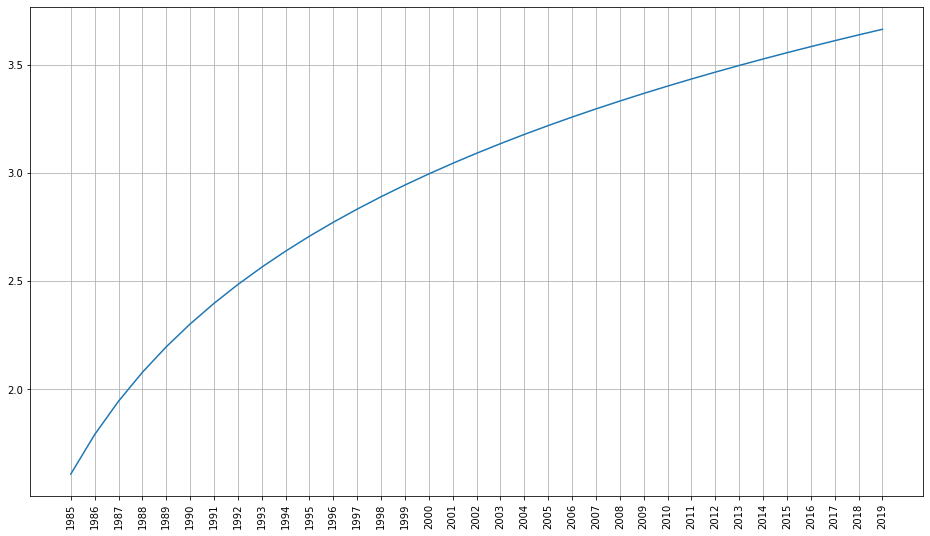

In [60]:
plt.figure(figsize=(16, 9))
x = years - 1980
y = np.log(x)
merged_data['Season'].unique().sort()
plt.plot(x, y)
plt.grid()
plt.xticks(x, labels=years, rotation=90);

In [16]:
params ={'n_estimators':10000,
          'num_leaves': 400,
          'min_child_weight': 0.034,
          'feature_fraction': 0.379,
          'bagging_fraction': 0.418,
          'min_data_in_leaf': 106,
          'objective': 'binary',
          'max_depth': -1,
          'learning_rate': 0.007,
          "boosting_type": "gbdt",
          #"bagging_seed": 11,
          "metric": 'binary_logloss',
          "verbosity": 10,
          'reg_alpha': 0.3899,
          'reg_lambda': 0.648,
          'random_state': 47,
          'task':'train', 'nthread':-1, 
         'verbose': 100,
#          'early_stopping_rounds': 30,
         'eval_metric': 'binary_logloss'
         }

In [79]:
lgb_num_leaves_max = 200
lgb_in_leaf = 10
lgb_lr = 0.001
lgb_bagging = 7
params_lgb = {'num_leaves': lgb_num_leaves_max,
              'min_data_in_leaf': lgb_in_leaf,
              'objective': 'binary',
              'max_depth': -1,
              'learning_rate': lgb_lr,
              "boosting_type": "gbdt",
              "bagging_seed": lgb_bagging,
              "metric": 'logloss',
              "verbosity": -1,
              'random_state': 42,
             }

In [80]:
from models import validate_model
from lightgbm import LGBMClassifier

validate_model(merged_data, LGBMClassifier(**params_lgb))

0.6518985636260556

# Submit

In [81]:
from data_preparation import merge_data, prepare_test
from models import predict_test

test_df = prepare_test(womens_dh.read_submission())
merged_data_test = merge_data(test_df.drop(columns=['ID', 'Pred']), womens_data)
merged_data_test

,Season,TeamID_1,TeamID_2,SeedNum_1,SeedNum_2,Score_sum_1,Score_mean_1,Score_median_1,Score_max_1,Score_min_1,...,SeedNum_diff,WinRate_diff,Score_sum_diff,Score_mean_diff,Score_median_diff,WinRate_ratio,Score_min_ratio,Score_max_ratio,Score_mean_ratio,Score_median_ratio
0,2015,3106,3107,15,13,1692,60.428571,61.5,85,43,...,2,-0.250000,-529,-8.977679,-6.5,0.666667,0.977273,0.913978,0.870650,0.904412
1,2015,3106,3110,15,14,1692,60.428571,61.5,85,43,...,1,-0.250000,-335,-2.915179,-1.0,0.666667,1.048780,1.075949,0.953978,0.984000
2,2015,3106,3113,15,3,1692,60.428571,61.5,85,43,...,12,-0.343750,-482,-7.508929,-6.5,0.592593,0.934783,0.955056,0.889473,0.904412
3,2015,3106,3114,15,11,1692,60.428571,61.5,85,43,...,4,-0.375000,-397,-4.852679,-4.5,0.571429,1.023810,0.977011,0.925665,0.931818
4,2015,3106,3116,15,10,1692,60.428571,61.5,85,43,...,5,-0.066667,-117,0.128571,4.0,0.882353,1.194444,1.089744,1.002132,1.069565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,2019,3413,3417,15,6,2132,71.066667,71.0,109,43,...,9,0.175000,-214,-2.245833,-3.0,1.280000,0.877551,1.090000,0.969366,0.959459
10076,2019,3413,3460,15,13,2132,71.066667,71.0,109,43,...,2,-0.012500,-114,0.879167,0.5,0.984615,1.162162,1.172043,1.012526,1.007092
10077,2019,3416,3417,12,6,1973,61.656250,61.5,78,41,...,6,0.187500,-373,-11.656250,-12.5,1.300000,0.836735,0.780000,0.841006,0.831081
10078,2019,3416,3460,12,13,1973,61.656250,61.5,78,41,...,-1,0.000000,-273,-8.531250,-9.0,1.000000,1.108108,0.838710,0.878451,0.872340


In [82]:
test_df

,ID,Pred,Season,TeamID_1,TeamID_2
0,2015_3106_3107,0.5,2015,3106,3107
1,2015_3106_3110,0.5,2015,3106,3110
2,2015_3106_3113,0.5,2015,3106,3113
3,2015_3106_3114,0.5,2015,3106,3114
4,2015_3106_3116,0.5,2015,3106,3116
...,...,...,...,...,...
10075,2019_3413_3417,0.5,2019,3413,3417
10076,2019_3413_3460,0.5,2019,3413,3460
10077,2019_3416_3417,0.5,2019,3416,3417
10078,2019_3416_3460,0.5,2019,3416,3460


In [84]:
predictions = predict_test(merged_data, merged_data_test, LGBMClassifier(**params_lgb))
womens_dh.make_submission(predictions)

2015 (2142, 34) (2016, 34) (2142,)
2016 (2268, 34) (2016, 34) (2268,)
2017 (2394, 34) (2016, 34) (2394,)
2018 (2520, 34) (2016, 34) (2520,)
2019 (2646, 34) (2016, 34) (2646,)


In [85]:
predictions

array([0.46376228, 0.48802512, 0.45239813, ..., 0.47043302, 0.50058167,
       0.51988937])